# Wine dataset by ANN, tensorflow.keras

In [24]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
#tf.random.set_seed(0)

In [25]:
# 데이터 불러오기
from sklearn import datasets
raw_wine = datasets.load_wine()

In [26]:
# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

In [27]:
# 피쳐 데이터 차원 확인
print(X.shape)

(178, 13)


In [28]:
# 타겟 데이터 종류 확인
print(set(y))

{0, 1, 2}


In [29]:
# 타겟 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y) 
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [30]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X, y_hot, 
                                        random_state=0)

In [31]:
# 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

n_feat = X_tn.shape[1]
n_class = len(set(y))
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))

In [32]:
# 신경망 모형 구조 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                280       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 63        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________________


In [33]:
# 모형 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [34]:
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Epoch 1/30
133/133 [==============================] - 0s 1ms/sample - loss: 0.9711 - acc: 0.6090
Epoch 2/30
133/133 [==============================] - 0s 203us/sample - loss: 0.9819 - acc: 0.5639
Epoch 3/30
133/133 [==============================] - 0s 225us/sample - loss: 0.8176 - acc: 0.6316
Epoch 4/30
133/133 [==============================] - 0s 231us/sample - loss: 0.8513 - acc: 0.5789
Epoch 5/30
133/133 [==============================] - 0s 205us/sample - loss: 0.7428 - acc: 0.6316
Epoch 6/30
133/133 [==============================] - 0s 210us/sample - loss: 0.6862 - acc: 0.7218
Epoch 7/30
133/133 [==============================] - 0s 202us/sample - loss: 0.7617 - acc: 0.6917
Epoch 8/30
133/133 [==============================] - 0s 180us/sample - loss: 0.7193 - acc: 0.7368
Epoch 9/30
133/133 [==============================] - 0s 255us/sample - loss: 0.6717 - acc: 0.7519
Epoch 10/30
133/133 [==============================] - 0s 195us/sample - loss: 0.5554 - acc: 0.8120
Epoch 11/30

In [35]:
# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

133/133 [==============================] - 0s 301us/sample - loss: 0.3057 - acc: 0.9323
0.93233085


In [36]:
# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

45/45 [==============================] - 0s 44us/sample - loss: 0.2313 - acc: 0.9778
0.9777778


In [37]:
import numpy as np
epoch = np.arange(1,epo+1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [38]:
accuracy = hist.history['accuracy'] 
print(accuracy)

KeyError: 'accuracy'

In [43]:
accuracy = hist.history['acc'] 
print(accuracy)

[0.60902256, 0.56390977, 0.6315789, 0.57894737, 0.6315789, 0.7218045, 0.6917293, 0.7368421, 0.7518797, 0.8120301, 0.7744361, 0.83458644, 0.7819549, 0.7969925, 0.7969925, 0.81954885, 0.7969925, 0.7894737, 0.83458644, 0.81954885, 0.83458644, 0.84210527, 0.81954885, 0.84962404, 0.87218046, 0.7593985, 0.8947368, 0.83458644, 0.81954885, 0.83458644]


In [44]:
loss = hist.history['loss'] 
print(loss)

[0.9711101550356787, 0.9818712956923291, 0.8175851189552393, 0.851307326465621, 0.7427668759697362, 0.6861561991666493, 0.7616634176189738, 0.7192709062780652, 0.6717332787531659, 0.5553762903787139, 0.620674865586417, 0.541555044346286, 0.5797140640871865, 0.6256526324309801, 0.5859409265948418, 0.5439269650251346, 0.6159654663021403, 0.5253361401925409, 0.45781622345286205, 0.5438324613566685, 0.47298885220871834, 0.3494470052253035, 0.49899286289412276, 0.39226885599301275, 0.4336185101839833, 0.5926265959676943, 0.42249224267731933, 0.4763253984370626, 0.41773002779573426, 0.43286155057804926]


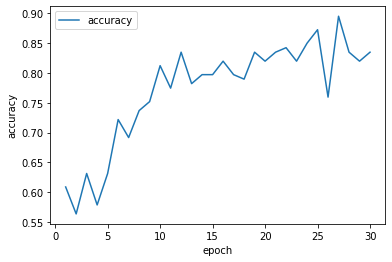

In [45]:
# 정확도 학습 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

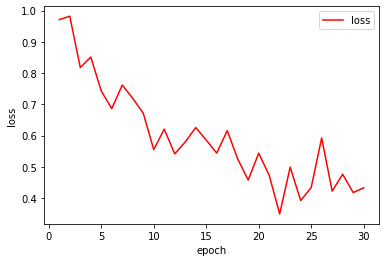

In [46]:
# 손실 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, loss,'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# XOR problem by tensorflow.keras

In [22]:
from sklearn import datasets
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

import matplotlib.pyplot as plt

# 랜덤 시드 설정
np.random.seed(1)
#tf.random.set_seed(1)

# 데이터 불러오기
#raw_wine = datasets.load_wine()

# 피쳐, 타겟 데이터 지정
#X = raw_wine.data
#y = raw_wine.target

#X_tn = np.array([[1, 0, 1], [0, 1, 1], [0, 0, 1], [1, 1, 1]])

X_tn = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])

y_tn = np.array([[1], [1], [0], [0]])

# 피쳐 데이터 차원 확인
print(X_tn.shape)

# 타겟 데이터 종류 확인
#print(set(y))

# 타겟 데이터 원-핫 인코딩
#y_tn = to_categorical(y_tn) 
#print(y_tn)
# 트레이닝/테스트 데이터 분할
#X_tn, X_te, y_tn, y_te=train_test_split(X, y_hot, random_state=0)

# 신경망 생성
n_feat = X_tn.shape[1]
#print(n_feat)
#n_class = len(set(y_tn))
n_class = y_tn.shape[1]
print(n_class)

epo = 3000

model = Sequential()
model.add(Dense(10, input_dim=n_feat))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
model.add(Activation('sigmoid'))
model.add(Dense(n_class))
#model.add(Activation('sigmoid'))
#model.add(Activation('softmax'))
#model.add(Activation('linear'))

##########################
#model = Sequential()
#model.add(Dense(8, input_dim=2))
#model.add(Activation('tanh'))
#model.add(Dense(1))
#model.add(Activation('sigmoid'))
##########################



# 신경망 모형 구조 확인
model.summary()

# 모형 컴파일
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

print(X_tn,y_tn)
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=1)

# 트레이닝 데이터 평가
#print(model.evaluate(X_tn, y_tn)[1])

print(model.predict(X_tn))


epoch = np.arange(1,epo+1)
accuracy = hist.history['accuracy'] 
loss = hist.history['loss'] 

# 정확도 학습 그래프
plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 손실 그래프
plt.plot(epoch, loss,'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

(4, 2)
1
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
[[1 0]
 [0 1]
 [0 0]
 [1 1]] [[1]
 [1]
 [0]
 [0]]
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/3000
4/4 [==============================] - 0s 23ms/sample - loss: 7.7125 - acc: 0.5000
Epoch 2/3000
4/4 [==============================] - 0s 1ms/sample - loss: 7.7125 - acc: 0.5000
Epoch 3/3000
4/4 [==========================

KeyError: 'accuracy'

## XOR problem by tensorflow

In [20]:
import tensorflow as tf
import numpy as np

import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior() 
#출처: https://gmnam.tistory.com/159 [Voyager]
 
x_data = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
y_data = np.array([[0],   [1],   [1],   [0]], dtype=np.float32)
 
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
 
# W = tf.Variable(tf.random_normal([2,1]), name = "weight")
# b = tf.Variable(tf.random_normal([1]), name = "bias")
# hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
 
W1 = tf.Variable(tf.random_normal([2,2]), name="weight1")
b1 = tf.Variable(tf.random_normal([2]), name="bias1")
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
 
W2 = tf.Variable(tf.random_normal([2,1]), name="weight2")
b2 = tf.Variable(tf.random_normal([1]), name="bias2")
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
 
# cost function / minimize cost
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
 
# predicate / accuracy
predicated = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicated, Y), dtype=tf.float32))
 
#
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step%1000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
    h, c, a = sess.run([hypothesis, predicated, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ",h,"\nCorrect: ",c,"\nAccuracy: ",a)
 


#출처: https://doorbw.tistory.com/141 [Tigercow.Door]

Instructions for updating:
non-resource variables are not supported in the long term
0 1.1256719 [array([[-1.6460712 , -0.45697555],
       [-1.6327164 , -0.62662107]], dtype=float32), array([[-0.2583486],
       [-1.26472  ]], dtype=float32)]
1000 0.6128491 [array([[-2.64823  , -0.8469152],
       [-2.6394472, -0.9671047]], dtype=float32), array([[-2.2117324 ],
       [-0.17226516]], dtype=float32)]
2000 0.49933022 [array([[-4.1254845 , -0.88866436],
       [-4.131737  , -1.0296642 ]], dtype=float32), array([[-4.2155137],
       [ 1.189633 ]], dtype=float32)]
3000 0.28314123 [array([[-5.0917263, -2.0515072],
       [-5.1129208, -2.070696 ]], dtype=float32), array([[-5.8480935],
       [ 3.8023734]], dtype=float32)]
4000 0.10785884 [array([[-5.6478157, -3.250915 ],
       [-5.661162 , -3.2527006]], dtype=float32), array([[-7.2913485],
       [ 6.1377325]], dtype=float32)]
5000 0.057350427 [array([[-5.950877 , -3.8423758],
       [-5.9607096, -3.8436277]], dtype=float32), array([[-8.241

# XOR problem by Keras

In [64]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
import numpy as np 

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(8, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

#model.fit(X, y, show_accuracy=True, batch_size=1, nb_epoch=1000)

model.fit(X, y, batch_size=1, nb_epoch=1000)

print(model.predict(X))

Train on 4 samples
Epoch 1/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.8411
Epoch 2/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.8065
Epoch 3/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7854
Epoch 4/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7737
Epoch 5/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.7649
Epoch 6/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7601
Epoch 7/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.7522
Epoch 8/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7511
Epoch 9/1000
4/4 [==============================] - 0s 4ms/sample - loss: 0.7463
Epoch 10/1000
4/4 [==============================] - 0s 5ms/sample - loss: 0.7459
Epoch 11/1000
4/4 [==============================] - 0s 3ms/sample - loss: 0.7434
Epoch 12/1000
4/4 [==============================] - 0s 6ms/sample - loss: 0.7409
Epoch 